# Linear Regression

## Sales Prediction (marketing-vs-Sales)
### Build a multiple linear model which predicts sales based on the money spent on different platforms for marketing

### Load Data

In [2]:
import pandas as pd
marketing_data = pd.read_csv('./data/marketing-sales.csv')
marketing_data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data Cleaning and Pre-Processing
- Fix Data Types
- Normalization (if required)
- Handle missing data
- Perform Data transformation/filtering (if required)

In [3]:
marketing_data =marketing_data.fillna(marketing_data.mean())

### Exploratory Data Analysis

<Figure size 1000x500 with 0 Axes>

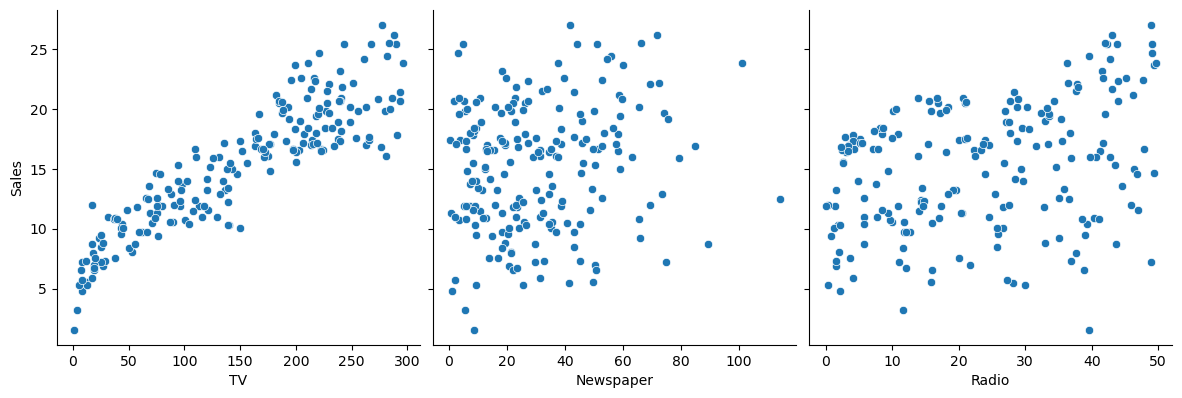

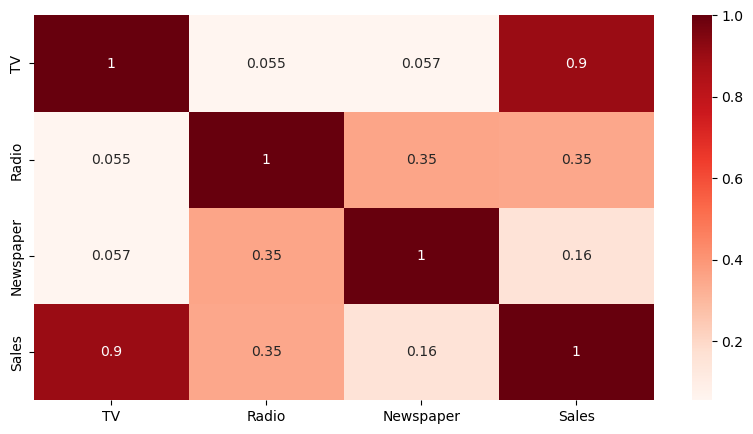

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# scattered plot between TV-Sales, Newspaper-Sales, Radio-Sales
plt.figure(figsize=(10,5))
sns.pairplot(marketing_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4,
              aspect=1, kind='scatter')
plt.show()

# Hitmap to find out the correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(marketing_data.corr(), cmap="Reds", annot = True)
plt.show()

### Build Multiple Linear Regression Model
- TV, Radio, Newspaper are features (x1,x2,x3)
- Sales is Label (y)

**Equation**
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$


#### Prepare Train-Test Dataset

In [5]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = marketing_data[['TV', 'Radio', 'Newspaper']]
y = marketing_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Build Model

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize the model
sales_model = LinearRegression()
# fit data to the model
sales_model.fit(X_train, y_train) 

# Print the coefficients 
print("Coefficients:", sales_model.coef_)
print("Intercept:", sales_model.intercept_)

Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


#### Evaluate Model

In [7]:
from sklearn.metrics import mean_squared_error
# Make predictions
y_pred = sales_model.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 1/2
print("Mean Squared Error:", mse,rmse)


Mean Squared Error: 2.907756910271091 1.4538784551355455


#### Inferences (Use model in real-world)

In [8]:
import numpy as np
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore", category=UserWarning)


# Single data point for inference
tv_ad_cost = 200
radio_ad_cost = 25
news_ad_cost = 40
# create 1x array_len matrix (column matrix)
single_data = np.array([tv_ad_cost,radio_ad_cost,news_ad_cost]).reshape(1,3)
print(single_data)
# Predict sales for the single data point
single_prediction = sales_model.predict(single_data)

# Display the prediction
print(f"Advertising Budget (TV: {tv_ad_cost}, Radio: {radio_ad_cost}, Newspaper: {news_ad_cost}) -> Predicted Sales: {single_prediction[0]:.2f}")

[[200  25  40]]
Advertising Budget (TV: 200, Radio: 25, Newspaper: 40) -> Predicted Sales: 18.31


#### Homework (Should be included in this notebook and also should be present in assignment PDF)
- Load the dataset and understand the features 
- Perform data preprocessing (handle missing values, normalization if needed).
- Perform Exploratory Data Analysis
- Split the dataset into training and testing sets.
- Build a Multiple Linear Regression model 
- Evaluate the model’s performance with R-squared and Root Mean Squared 
- Investigate the correlation between features and target and provide an explanation based on model coefficients.
- Inferences (Use model for any real-world value prediction)

**GROUP A**
- Build a Multiple Linear Regression model to predict house prices from the Boston Housing Dataset
-  https://github.com/selva86/datasets/blob/master/BostonHousing.csv

**GROUP B**
- Train a Multiple Linear Regression model to predict the car price
- https://archive.ics.uci.edu/dataset/19/car+evaluation

**GROUP C**
- Build a Multiple Linear Regression model to predict the student's final grade
- https://archive.ics.uci.edu/dataset/320/student+performance

**GROUP D**
- Predicting Heart Disease Risk (Heart Disease Dataset)
- https://archive.ics.uci.edu/dataset/45/heart+disease

# Classification
### Gaussian Naive Bayes Classifier

#### Load, and prepare dataset

In [9]:
from sklearn.datasets import load_iris
from IPython.display import display
# Load the Iris dataset
iris = load_iris() 
# create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0=setosa, 1=versicolor, 2=virginica)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Split data into test and train dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the GNB Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Make Predictions

In [12]:
# Make predictions
y_pred = gnb.predict(X_test)

#### Evaluate the model


In [13]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", )
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Homework (Should be included in this notebook and also should be present in assignment PDF)
- Load the dataset and understand the features
- Perform data processing
- Perform Exploratory Data Analysis & Visualize the data using various graphs 
- Split the dataset into training and testing sets
- Build a Gaussian Naive Bayes (GNB) classification model
- Evaluate the model's performance

#### **GROUP A: Predicting Car Evaluation**

**Dataset**: [Car Evaluation Dataset](https://archive.ics.uci.edu/ml/datasets/car+evaluation)


- Build a GNB model to classify cars into categories such as “unacceptable,” “acceptable,” and “good” based on features like buying price, maintenance cost, number of doors, and more.

---

#### **GROUP B: Predicting Heart Disease Risk**

**Dataset**: [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease)


- Build a GNB model to predict whether an individual has heart disease based on features such as age, sex, cholesterol levels, and blood pressure.

---

#### **GROUP C: Predicting Breast Cancer Diagnosis**

**Dataset**: [Breast Cancer Wisconsin Diagnostic Dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+diagnostic)


- Build a GNB model to classify breast cancer diagnoses as **malignant** or **benign** based on features like mean radius, texture, and smoothness.

---

#### **GROUP D: Predicting Pima Indians Diabetes**

**Dataset**: [Pima Indians Diabetes Dataset](https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/diabetes.csv)


- Build a GNB model to predict whether a person has diabetes based on features like age, BMI, insulin levels, and blood pressure.



### Evaluation Criteria:
- **Accuracy**: Measures the proportion of correct predictions.
- **Precision**: Indicates the proportion of true positives out of all predicted positives.
- **Recall**: Measures the proportion of true positives out of all actual positives.
- **F1-Score**: A harmonic mean of precision and recall, useful for imbalanced datasets.
- **Confusion Matrix**: A table that summarizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives.


## Clustering
- Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group

![Clustering](./assets/Customer_Segmentation.png)

## Clustering Algorithms
- K-means
- MeanShift
- DBSCAN

### K-Means Clustering Algorithm
- Choose the Number of Clusters (k): We decide how many clusters you want the data divided into.

- Initialize Cluster Centers: Randomly select k points from the data as initial cluster centers (also called centroids).

- Assign Data Points to Clusters: Each data point is assigned to the cluster whose centroid is closest (measured by distance, usually Euclidean).

- Update Centroids: For each cluster, compute the new centroid as the average of all points assigned to that cluster.

- Repeat: Reassign points to clusters based on the updated centroids and recompute the centroids. This process is repeated until the centroids stop changing significantly or a maximum number of iterations is reached.
- Finally The algorithm returns the final clusters and their centroids, after n number of iteration (max_iter)
![K-Means Clustering](./assets/k-means.png)


In [2]:
import pandas as pd
home_data = pd.read_csv('data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


### Plot scattered plot to visualize the data

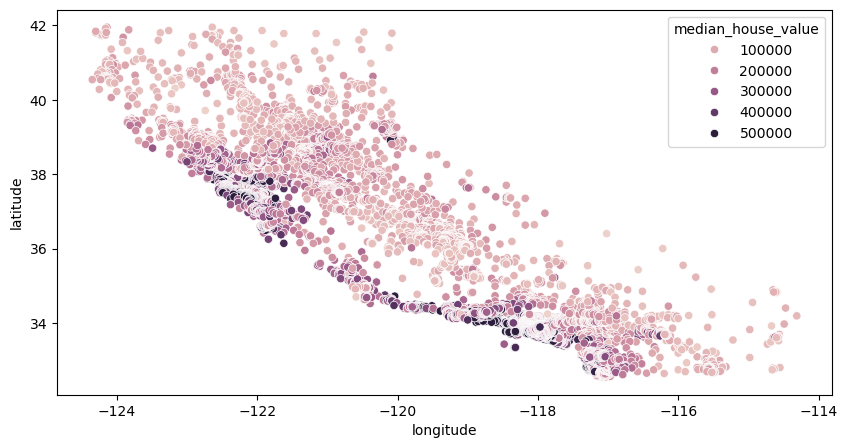

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()


### Split Train/Test and Normalize Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

### Fit the data to the K-Means Model and plot the clusters into scattered Plot

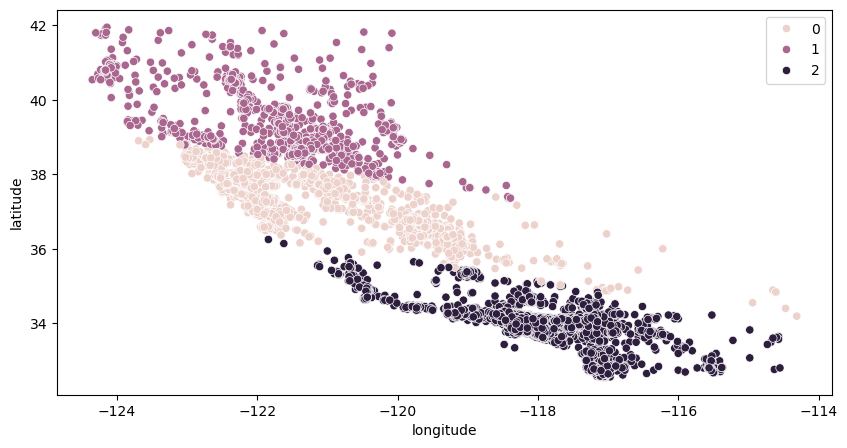

In [11]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

plt.figure(figsize=(10,5))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

### Evaluate Clustering Model using Silhouetee Score (lower score represents a better fit)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')


0.7499371920704208